In [4]:
!pip install qiskit
import qiskit as q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.4 MB/s 
     |████████████████████████████████| 18.0 MB 222 kB/s 
     |████████████████████████████████| 240 kB 46.4 MB/s 
     |████████████████████████████████| 198 kB 57.8 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 61.7 MB/s 
     |████████████████████████████████| 1.6 MB 37.5 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 943 kB 59.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 27.6 MB/s 
     |████████████████████████████████| 112 kB 58.8 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=97bebc75ff

In [5]:
!pip install pylatexenc
import pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.1 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=7f3f5ed08c1d09087372b415e439f535a493608aed956906cd68b3b65ec34df0
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [205]:

from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import matplotlib.pyplot as plt
from qiskit import BasicAer
from qiskit.providers.aer import QasmSimulator
from qiskit import *
import numpy as np
import qiskit.quantum_info as qi
from qiskit.utils import QuantumInstance
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit.providers.aer import QasmSimulator


In [206]:
import time
import matplotlib.pyplot as plt
from IPython import display
True

True

In [207]:
def fun(a,b,c,e,f):
  fun= ((not c or (d and (not e)))and a and b)
  if fun==True:
    fun=1
  else :
    fun=0
  return fun

In [208]:
from re import A
diag=np.arange(1024).reshape(32,32)
for m in [0,1]:
  if m==0:
      a=False
  else :
      a=True
  for q in [0,1]:
    if q==0:
           b=False
    else :
            b=True
    for i in [0,1]:
        if i==0:
           c=False
        else :
            c=True
        for j in [0,1]:
           if j==0:
              d=False
           else :
              d=True 
           for k in [0,1]:
                if k==0:
                   e=False
                else :
                   e=True 
                z=m*(16)+q*(8)+i*(4)+j*(2)+k
                for y in range(0,32):
                     if y==z:
                        diag[y,z]=(-1)**(fun(a,b,c,e,f)) 
                     else:
                        diag[y,z]=0
print(diag)

[[ 1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ...  0  0  1]]


In [209]:
#oracle code
ora=QuantumCircuit(5,name='oracle')
racl=Operator(diag)
ora.unitary(racl,[0,1,2,3,4],label='ora')
ora.draw()

┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1     ├
     │      │
q_2: ┤2 ora ├
     │      │
q_3: ┤3     ├
     │      │
q_4: ┤4     ├
     └──────┘

In [210]:
diffuse = QuantumCircuit(5,name='reflect')
diffuse.h([0,1,2,3,4])
diffuse.x([0,1,2,3,4])
diffuse.h([4])
diffuse.mct(list(range(4)),4)
diffuse.h(4)
diffuse.x([0,1,2,3,4])
diffuse.h([0,1,2,3,4])
diffuse.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_3: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [211]:
grov_qr = QuantumRegister(5)
grov_qc = QuantumCircuit(grov_qr, name='Ora')
grov_qc.h([0,1,2,3,4])
#1
grov_qc.append(ora,[0,1,2,3,4])
grov_qc.append(diffuse,[0,1,2,3,4])
#2
grov_qc.append(ora,[0,1,2,3,4])
grov_qc.append(diffuse,[0,1,2,3,4])

#3
job=execute(grov_qc,backend)
result = job.result()
stv = qi.Statevector.from_instruction(grov_qc)

grov_qc.measure_all()
grov_qc.draw()

┌───┐┌─────────┐┌──────────┐┌─────────┐┌──────────┐ ░ ┌─┐            
q3142_0: ┤ H ├┤0        ├┤0         ├┤0        ├┤0         ├─░─┤M├────────────
         ├───┤│         ││          ││         ││          │ ░ └╥┘┌─┐         
q3142_1: ┤ H ├┤1        ├┤1         ├┤1        ├┤1         ├─░──╫─┤M├─────────
         ├───┤│         ││          ││         ││          │ ░  ║ └╥┘┌─┐      
q3142_2: ┤ H ├┤2 oracle ├┤2 reflect ├┤2 oracle ├┤2 reflect ├─░──╫──╫─┤M├──────
         ├───┤│         ││          ││         ││          │ ░  ║  ║ └╥┘┌─┐   
q3142_3: ┤ H ├┤3        ├┤3         ├┤3        ├┤3         ├─░──╫──╫──╫─┤M├───
         ├───┤│         ││          ││         ││          │ ░  ║  ║  ║ └╥┘┌─┐
q3142_4: ┤ H ├┤4        ├┤4         ├┤4        ├┤4         ├─░──╫──╫──╫──╫─┤M├
         └───┘└─────────┘└──────────┘└─────────┘└──────────┘ ░  ║  ║  ║  ║ └╥┘
 meas: 5/═══════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                                0  1  2  3  4

In [212]:

sim = QasmSimulator()
options = {'method': 'statevector'}
execute(grov_qc, sim, backend_options=options)

stv.draw('latex')

<IPython.core.display.Latex object>

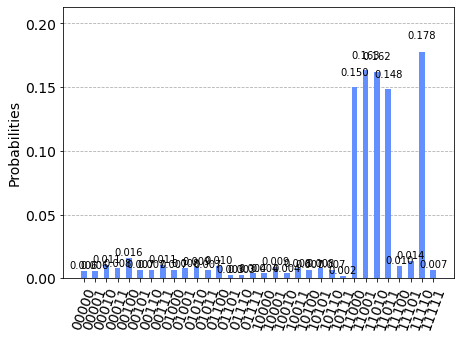

In [213]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grov_qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)